In [1]:
import pandas as pd
import soccerdata as sd
from soccerdata import MatchHistory

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sns.set_context("notebook")
sns.set_style("whitegrid")

In [6]:
df_final = pd.read_csv("/Users/christianhellum/Cand. Merc./Data-Science-Project/data_science_project/Beat the bookies/data/Football_data_final_final.csv")

In [14]:
df_final.shape
df_final.columns

Index(['Wk', 'Day', 'Date', 'Time', 'Home', 'Away', 'FTR', 'Attendance',
       'B365H', 'B365D', 'B365A', 'AttackStrengthHome', 'AttackStrengthAway',
       'DefenseWeaknessHome', 'DefenseWeaknessAway', 'Season', 'AvgHomePoints',
       'AvgAwayPoints', 'AvgLosingHomePoints', 'AvgLosingAwayPoints',
       'AvgGoalDiffHome', 'AvgGoalDiffAway', 'HomeWinsRatio', 'HomeDrawsRatio',
       'AwayWinsRatio', 'AwayDrawsRatio', 'AvgHomeCornersLast5',
       'AvgAwayCornersLast5', 'AvgHomeShotsLast5', 'AvgHomeShotsOnTargetLast5',
       'AvgAwayShotsLast5', 'AvgAwayShotsOnTargetLast5', 'elo', 'elo_away',
       'FormHomeTeam', 'FormAwayTeam', 'ProbabilityDraw', 'ProbabilityHomeWin',
       'ProbabilityAwayWin'],
      dtype='object')

In [15]:
df_final.head()

,Wk,Day,Date,Time,Home,Away,FTR,Attendance,B365H,B365D,...,AvgHomeShotsOnTargetLast5,AvgAwayShotsLast5,AvgAwayShotsOnTargetLast5,elo,elo_away,FormHomeTeam,FormAwayTeam,ProbabilityDraw,ProbabilityHomeWin,ProbabilityAwayWin
0,1.0,Fri,2019-08-16,20:00,Athletic Club,Barcelona,H,47693.0,5.25,3.80,...,0.0,0.0,0.0,1722.019409,2001.228638,0.0,0.0,0.226260,0.127955,0.645785
1,1.0,Sat,2019-08-17,16:00,Celta Vigo,Real Madrid,A,23566.0,4.75,4.20,...,0.0,0.0,0.0,1681.163452,1841.848999,0.0,0.0,0.239320,0.266267,0.494412
2,1.0,Sat,2019-08-17,18:00,Valencia,Real Sociedad,D,41846.0,1.66,3.75,...,0.0,0.0,0.0,1813.655029,1719.431152,0.0,0.0,0.229859,0.616701,0.153439
3,1.0,Sat,2019-08-17,19:00,Mallorca,Eibar,H,15127.0,2.80,3.20,...,0.0,0.0,0.0,1566.961060,1712.778198,0.0,0.0,0.240204,0.286297,0.473499
4,1.0,Sat,2019-08-17,20:00,Leganés,Osasuna,A,10020.0,2.00,3.20,...,0.0,0.0,0.0,1670.794800,1641.649048,0.0,0.0,0.237143,0.533531,0.229326


In [16]:
df_final["FTR"].value_counts()

FTR
H    831
A    520
D    509
Name: count, dtype: int64

In [13]:
df_final.dtypes

Wk                           float64
Day                           object
Date                          object
Time                          object
Home                          object
Away                          object
FTR                           object
Attendance                   float64
B365H                        float64
B365D                        float64
B365A                        float64
AttackStrengthHome           float64
AttackStrengthAway           float64
DefenseWeaknessHome          float64
DefenseWeaknessAway          float64
Season                        object
AvgHomePoints                float64
AvgAwayPoints                float64
AvgLosingHomePoints          float64
AvgLosingAwayPoints          float64
AvgGoalDiffHome              float64
AvgGoalDiffAway              float64
HomeWinsRatio                float64
HomeDrawsRatio               float64
AwayWinsRatio                float64
AwayDrawsRatio               float64
AvgHomeCornersLast5          float64
A

In [19]:
def home_away_results(df_final: pd.DataFrame):
    """Returns aggregated home/away results per team"""

    res = (
        pd.melt(df_final.reset_index(),
                id_vars=['Date', 'FTR'],
                value_name='team', var_name='is_home',
                value_vars=['Home', 'Away']))

    res.is_home = res.is_home.replace(['home_team', 'away_team'], ['Home', 'Away'])
    res['win'] = res['lose'] = res['draw'] = 0
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'H'), 'win'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'A'), 'win'] = 1
    res.loc[(res['is_home'] == 'Home') & (res['FTR'] == 'A'), 'lose'] = 1
    res.loc[(res['is_home'] == 'Away') & (res['FTR'] == 'H'), 'lose'] = 1
    res.loc[res['FTR'] == 'D', 'draw'] = 1

    g = res.groupby(['team', 'is_home'])
    w = (g.win.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_win', 'mean': 'win_pct'}))
    l = (g.lose.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_lose', 'mean': 'lose_pct'}))
    d = (g.draw.agg(['sum', 'mean'])
         .rename(columns={'sum': 'n_draw', 'mean': 'draw_pct'}))

    res = pd.concat([w, l, d], axis=1)
    return res

In [20]:
results = home_away_results(df_final)
results.head(6)

n_win   win_pct  n_lose  lose_pct  n_draw  draw_pct
team          is_home                                                     
Alavés        Away        10  0.135135      48  0.648649      16  0.216216
              Home        28  0.378378      27  0.364865      19  0.256757
Almería       Away         3  0.083333      25  0.694444       8  0.222222
              Home        10  0.277778      15  0.416667      11  0.305556
Athletic Club Away        23  0.247312      35  0.376344      35  0.376344
              Home        46  0.494624      25  0.268817      22  0.236559

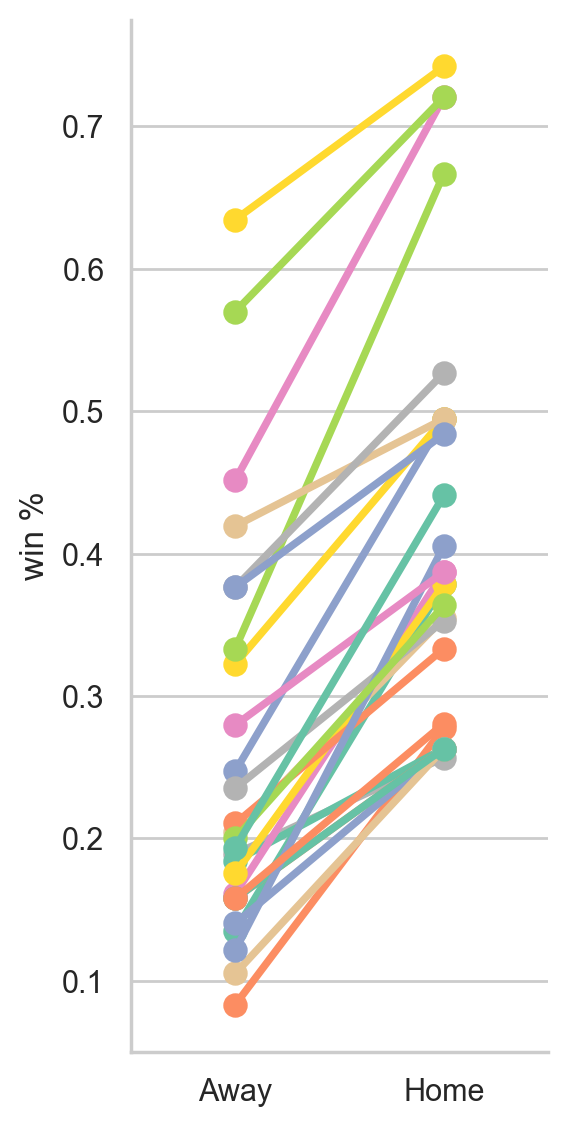

In [23]:
g = sns.FacetGrid(results.reset_index(), hue='team', palette='Set2', height=6, aspect=.5)
g.map(sns.pointplot, 'is_home', 'win_pct', order=["Away", "Home"])
g.set_axis_labels('', 'win %');

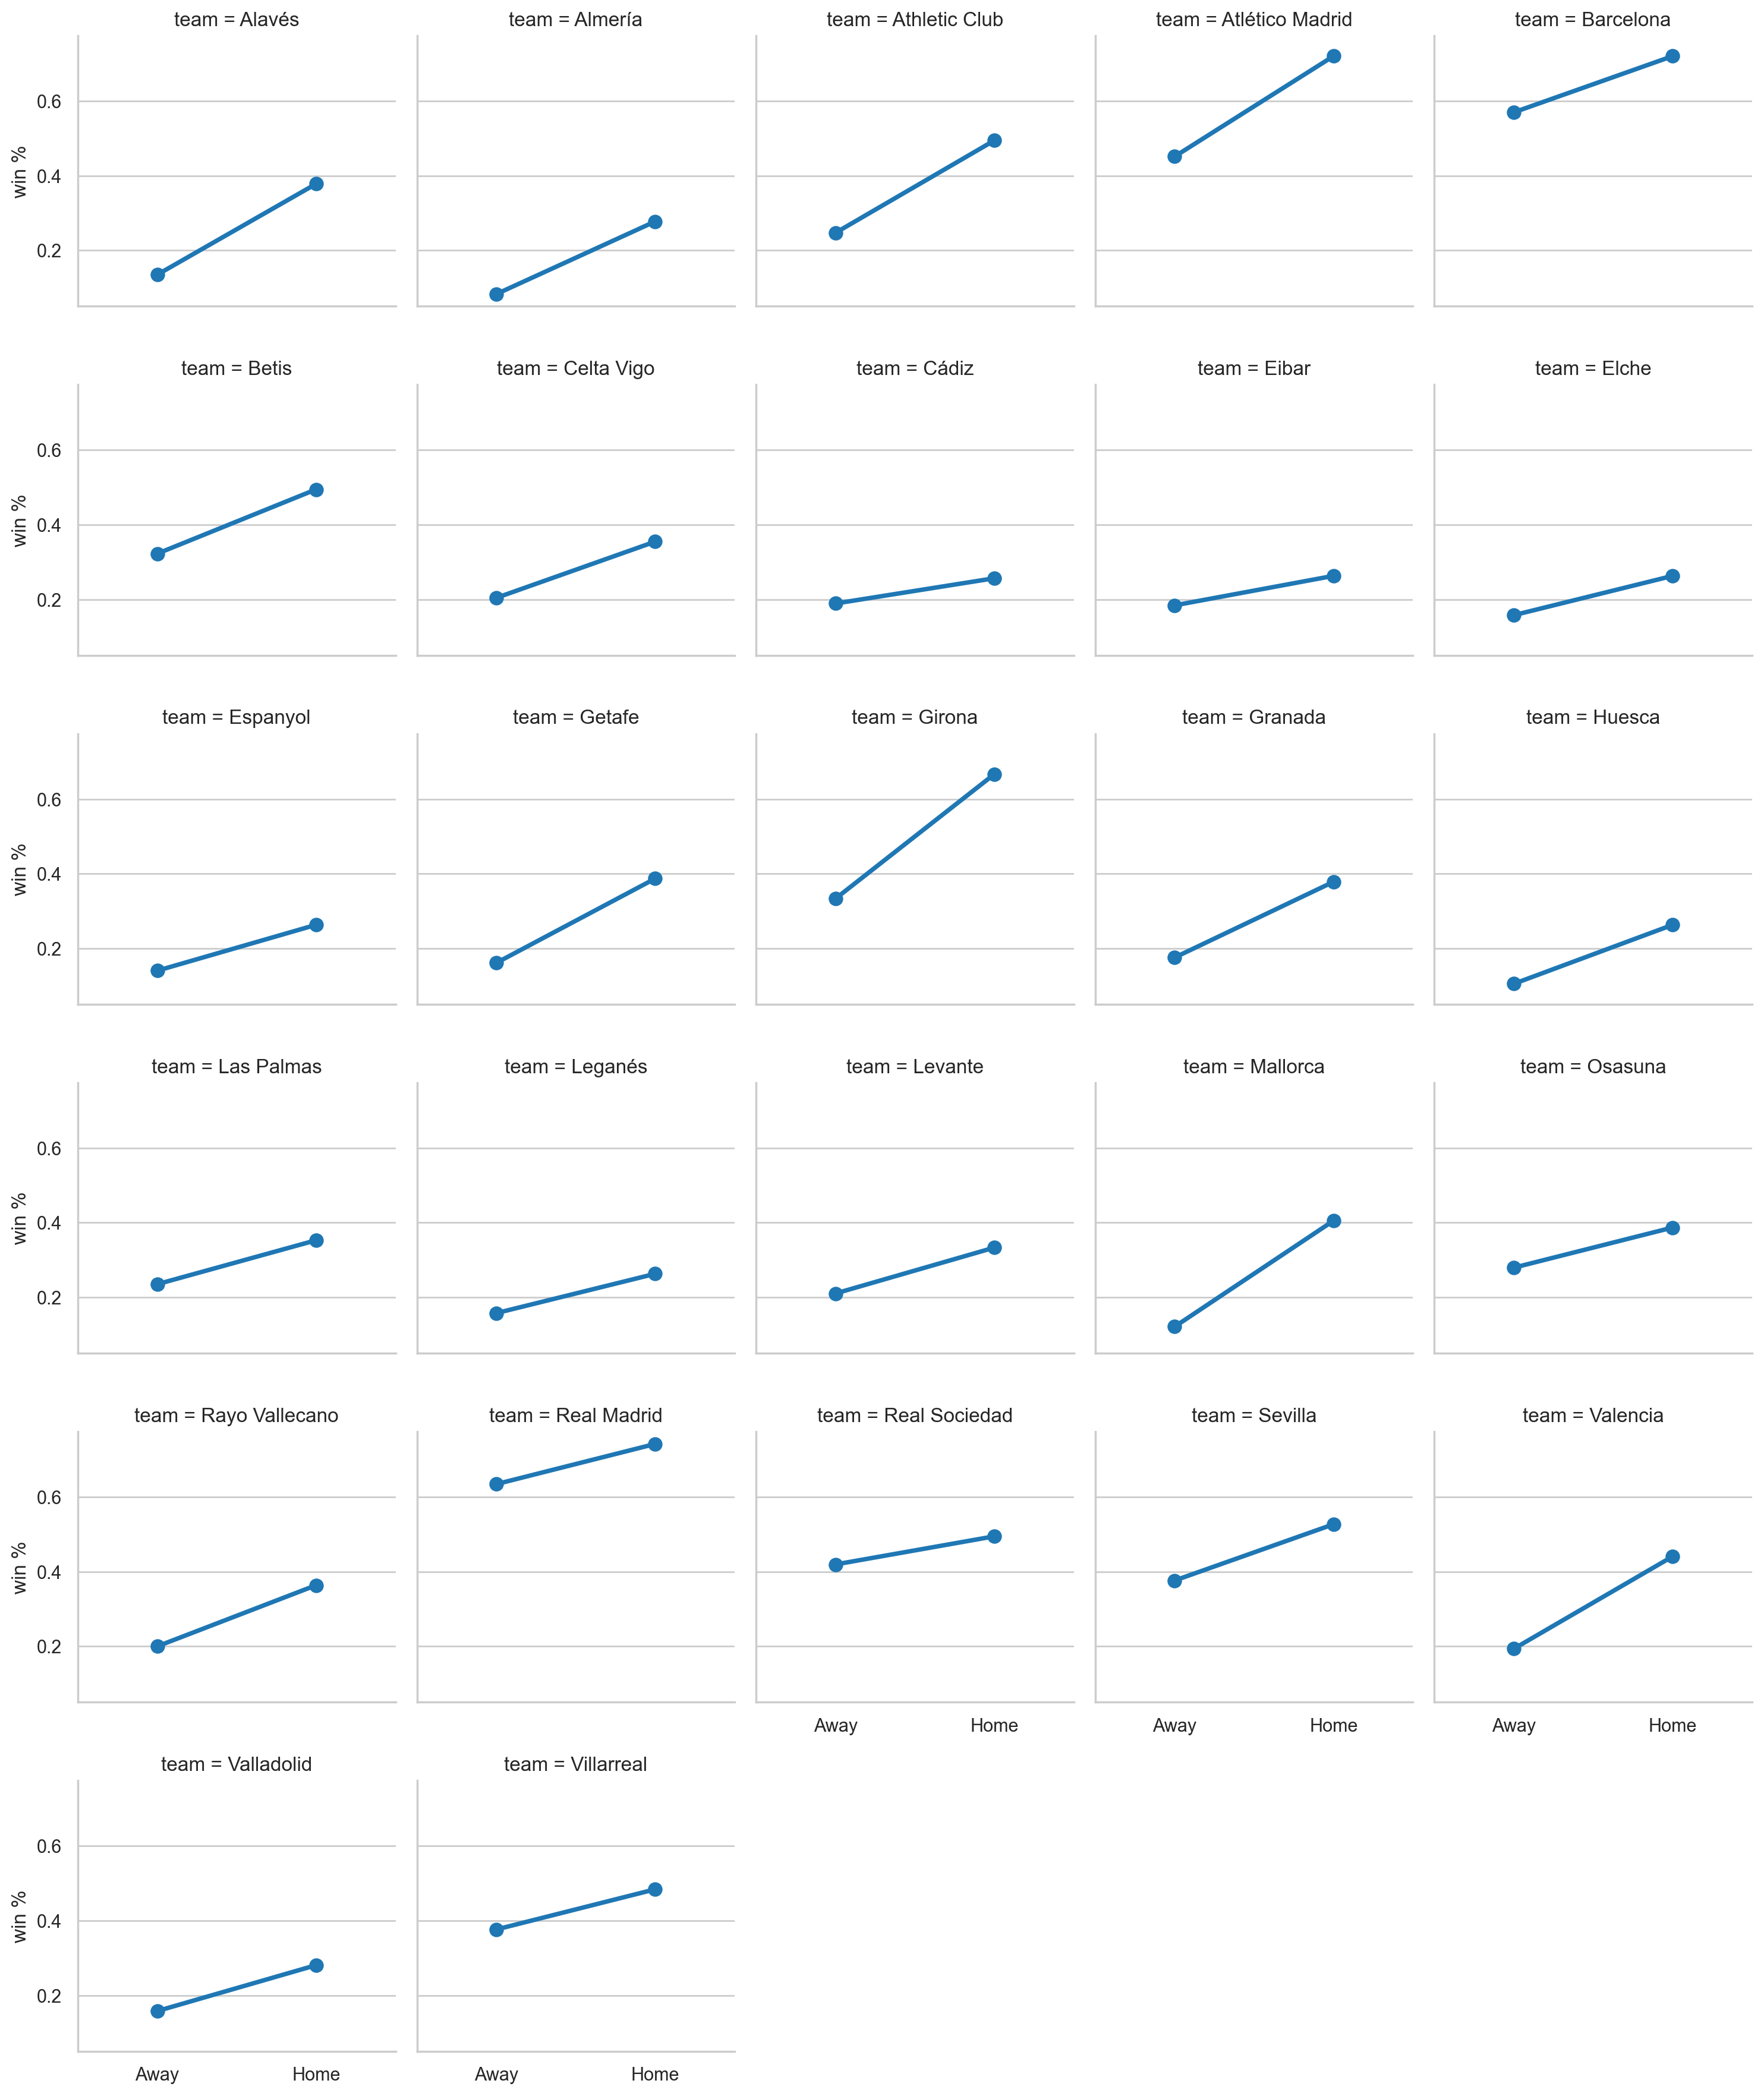

In [24]:
g = sns.FacetGrid(results.reset_index(), col='team', col_wrap=5)
g.map(sns.pointplot, 'is_home', 'win_pct', order=["Away", "Home"])
g.set_axis_labels('', 'win %');

In [31]:
cadiz = df_final[df_final['Home'] == 'Cádiz']
rm = df_final[df_final['Home'] == 'Real Madrid']

In [33]:
avg_cadiz = cadiz['Attendance'].mean()
avg_rm = rm['Attendance'].mean()
print(avg_cadiz)
print(avg_rm)

16561.800000000003
58194.25


In [39]:
df_final['B365_guess'] = df_final[['B365H', 'B365D', 'B365A']].idxmin(axis=1).str[-1]
df_final['B365_guess']

0       A
1       A
2       H
3       A
4       H
       ..
1855    A
1856    H
1857    H
1858    H
1859    H
Name: B365_guess, Length: 1860, dtype: object

In [43]:
df_final.head()

,Wk,Day,Date,Time,Home,Away,FTR,Attendance,B365H,B365D,...,AvgAwayShotsLast5,AvgAwayShotsOnTargetLast5,elo,elo_away,FormHomeTeam,FormAwayTeam,ProbabilityDraw,ProbabilityHomeWin,ProbabilityAwayWin,B365_guess
0,1.0,Fri,2019-08-16,20:00,Athletic Club,Barcelona,H,47693.0,5.25,3.80,...,0.0,0.0,1722.019409,2001.228638,0.0,0.0,0.226260,0.127955,0.645785,A
1,1.0,Sat,2019-08-17,16:00,Celta Vigo,Real Madrid,A,23566.0,4.75,4.20,...,0.0,0.0,1681.163452,1841.848999,0.0,0.0,0.239320,0.266267,0.494412,A
2,1.0,Sat,2019-08-17,18:00,Valencia,Real Sociedad,D,41846.0,1.66,3.75,...,0.0,0.0,1813.655029,1719.431152,0.0,0.0,0.229859,0.616701,0.153439,H
3,1.0,Sat,2019-08-17,19:00,Mallorca,Eibar,H,15127.0,2.80,3.20,...,0.0,0.0,1566.961060,1712.778198,0.0,0.0,0.240204,0.286297,0.473499,A
4,1.0,Sat,2019-08-17,20:00,Leganés,Osasuna,A,10020.0,2.00,3.20,...,0.0,0.0,1670.794800,1641.649048,0.0,0.0,0.237143,0.533531,0.229326,H


In [40]:
count_same_result = df_final[df_final['FTR'] == df_final['B365_guess']].groupby('FTR').size()

In [41]:
count_same_result

FTR
A    297
H    696
dtype: int64

In [51]:
summary_stats = df_final.describe()

In [52]:
summary_stats = summary_stats.drop(['25%', '50%', '75%'])

In [53]:
summary_stats.T

,count,mean,std,min,max
Wk,1860.0,19.134409,10.794585,1.000000,38.000000
Attendance,1860.0,27344.768185,17962.097714,13.000000,95745.000000
B365H,1860.0,2.615581,1.392970,1.080000,13.000000
B365D,1860.0,3.760758,0.955110,2.750000,11.000000
B365A,1860.0,4.277468,2.851064,1.180000,26.000000
AttackStrengthHome,1860.0,0.044351,0.024910,0.000000,0.235294
AttackStrengthAway,1860.0,0.044675,0.026987,0.000000,0.368421
DefenseWeaknessHome,1860.0,0.044482,0.025009,0.000000,0.363636
DefenseWeaknessAway,1860.0,0.043821,0.022513,0.000000,0.200000
AvgHomePoints,1860.0,1.488284,0.766632,0.000000,3.000000


In [54]:
targetData = df_final['FTR'].replace({'H':1,'D':0,'A':-1})

/var/folders/8l/n92rnf315xdf87gkyx0s1n840000gn/T/ipykernel_15815/3008560993.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  targetData = df_final['FTR'].replace({'H':1,'D':0,'A':-1})


In [77]:
prev_5_data = df_final[['AvgHomeCornersLast5', 'AvgAwayCornersLast5', 'AvgHomeShotsLast5', 'AvgHomeShotsOnTargetLast5', 'AvgAwayShotsLast5', 'AvgAwayShotsOnTargetLast5']]

In [75]:
from pandas import DataFrame
print("Correlation between [AvgHomeCornersLast5, AvgAwayCornersLast5, AvgHomeShotsLast5, AvgHomeShotsOnTargetLast5, AvgAwayShotsLast5, AvgAwayShotsOnTargetLast5] and Result:")
print(list(DataFrame.corrwith(prev_5_data, targetData)),'\n')

Correlation between [AvgHomeCornersLast5, AvgAwayCornersLast5, AvgHomeShotsLast5, AvgHomeShotsOnTargetLast5, AvgAwayShotsLast5, AvgAwayShotsOnTargetLast5] and Result:
[0.08233174532936187, -0.1131950472840981, 0.1257956854724747, 0.15070631537726642, -0.16957878044439972, -0.1783127496783623] 



In [64]:
from pandas.plotting import parallel_coordinates

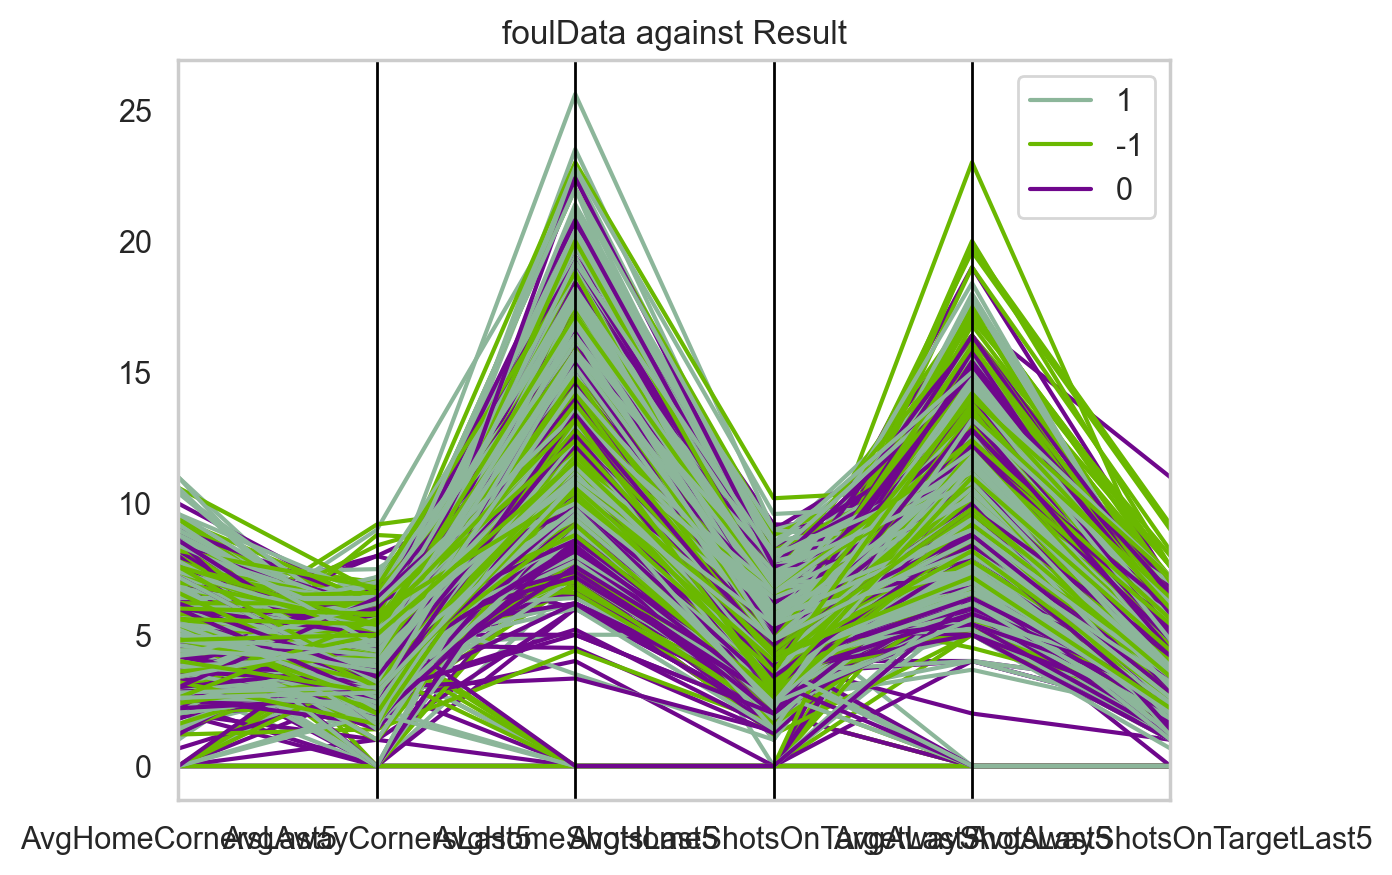

In [76]:
mergedData1 = pd.concat([prev_5_data,targetData],axis = 1)
parallel_coordinates(mergedData1, 'FTR')
plt.title("prev_5_data against Result")
plt.show()

In [81]:
elo_data = df_final[['elo', 'elo_away']]

In [83]:
print("Correlation between elo, elo_away and Result:")
print(list(DataFrame.corrwith(elo_data, targetData)),'\n')

Correlation between elo, elo_away and Result:
[0.2529546351848315, -0.29885108821552553] 

